<a href="https://colab.research.google.com/github/AzamChatrAzar/neumerical-datasets/blob/main/dieabet_with_new_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from seaborn import set_style
set_style('darkgrid')


In [2]:
#بارگذاری دیتا ست diabetes
diabet=load_diabetes()
data=pd.DataFrame(diabet.data ,columns=diabet.feature_names)
data["target"]=diabet.target
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
X = data.drop('target', axis=1)

y = data['target']  # ستون هدف


In [5]:
# تقسیم‌بندی داده‌ها به مجموعه آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13)


In [6]:
# ایجاد مدل KNN
k = int(np.sqrt(len(y_train)))  # تعداد همسایه‌ها
knn = KNeighborsRegressor(n_neighbors=k)

# آموزش مدل
knn.fit(X_train, y_train)

# پیش‌بینی
y_pred = knn.predict(X_test)
r2 = r2_score(y_test, y_pred)
# محاسبه خطای میانگین مربعات
mse1 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error KNN Regression: {mse1}')
print(f'R2 Squared KNN Regression:{r2} ')

Mean Squared Error KNN Regression: 2746.347979749737
R2 Squared KNN Regression:0.5635226823147235 


In [7]:
# ایجاد مدل رگرسیون خطی
linear_model = LinearRegression()

# آموزش مدل
linear_model.fit(X_train, y_train)

# پیش‌بینی
y_pred = linear_model.predict(X_test)
r2_lin = r2_score(y_test, y_pred)
# محاسبه خطای میانگین مربعات
mse2 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error linear Regression: {mse2}')

print(f'R2 Squared LinearRegression:{r2_lin} ')

Mean Squared Error linear Regression: 2280.438085561101
R2 Squared LinearRegression:0.6375697813706187 


In [8]:
# ایجاد مدل رگرسیون ریج
ridge_model = Ridge(alpha=1.0)

# آموزش مدل رگرسیون ریج
ridge_model.fit(X_train, y_train)

# پیش‌بینی با رگرسیون ریج
y_pred_ridge = ridge_model.predict(X_test)

# محاسبه خطای میانگین مربعات برای رگرسیون ریج
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Mean Squared Error (Ridge Regression): {mse_ridge}')
print(f'R2 Score RidgeRegression:{r2_ridge} ')

Mean Squared Error (Ridge Regression): 2678.3364754670974
R2 Score RidgeRegression:0.5743317564669844 


In [9]:
# ایجاد مدل رگرسیون لاسو
lasso_model = Lasso(alpha=1.0)

# آموزش مدل رگرسیون لاسو
lasso_model.fit(X_train, y_train)

# پیش‌بینی با رگرسیون لاسو
y_pred_lasso = lasso_model.predict(X_test)

# محاسبه خطای میانگین مربعات برای رگرسیون لاسو
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Mean Squared Error (Lasso Regression): {mse_lasso}')
print(f'R2 Score LassoRegression:{r2_lasso} ')

Mean Squared Error (Lasso Regression): 3446.8169673754096
R2 Score LassoRegression:0.45219708661638247 


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
target_col = 'target'  # ستون هدف (مقادیر عددی)
feature_cols = data.columns.drop([target_col])  # لیست ستون‌های ویژگی

# جدا کردن ویژگی‌ها و تارگت
X = data[feature_cols].values
y = data[target_col].values

# تقسیم داده به train و test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13)

# نرمال‌سازی داده‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:


# لیست ذخیره پیش‌بینی‌های هر ویژگی برای هر نمونه تست
feature_predictions_per_test = []

# پردازش هر نمونه تست
for i in range(len(X_test)):
    # لیست ذخیره پیش‌بینی‌های هر ویژگی برای این نمونه تست
    single_test_feature_predictions = []

    # پردازش هر ویژگی به صورت جداگانه
    for feature_idx in range(X.shape[1]):
        # انتخاب فقط یک ویژگی از داده‌های آموزش
        X_train_feature = X_train_scaled[:, feature_idx].reshape(-1, 1)
        y_train_target = y_train

        # آموزش رگرسیون خطی روی این ویژگی
        lr = LinearRegression()
        lr.fit(X_train_feature, y_train_target)

        # پیش‌بینی برای این ویژگی در نمونه تست فعلی
        X_test_feature = X_test_scaled[i, feature_idx].reshape(1, -1)
        pred = lr.predict(X_test_feature)[0]
        single_test_feature_predictions.append(pred)

    # ذخیره بردار پیش‌بینی‌های این نمونه تست
    feature_predictions_per_test.append(single_test_feature_predictions)

# تبدیل لیست به آرایه numpy
feature_predictions_per_test = np.array(feature_predictions_per_test)




# MSE برای میانگین پیش‌بینی‌های هر ویژگی
mean_feature_predictions = np.mean(feature_predictions_per_test, axis=1)
mse_mean_features = mean_squared_error(y_test, mean_feature_predictions)
r2_mean_features = r2_score(y_test, mean_feature_predictions)




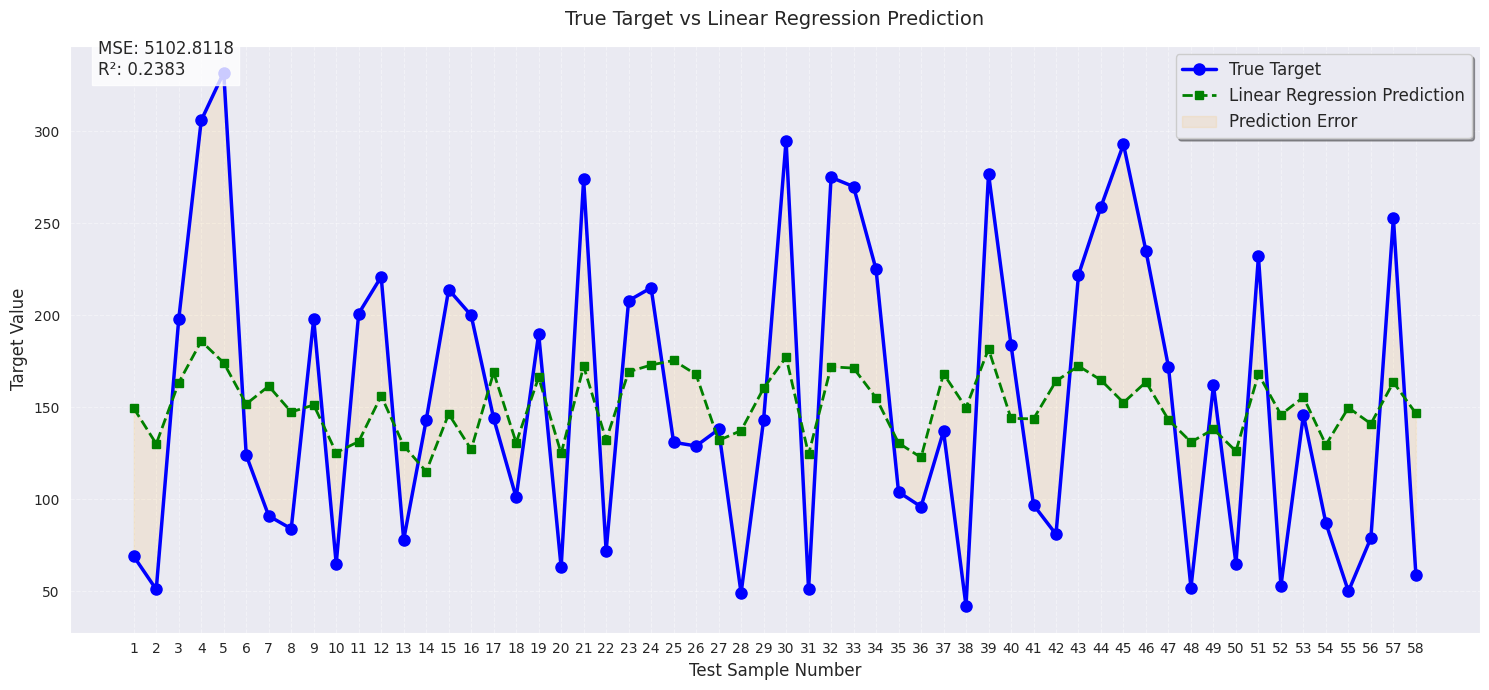

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# تنظیمات سبک نمودار

plt.figure(figsize=(15, 7))

# ایجاد داده برای نمودار
sample_numbers = np.arange(1, len(y_test)+1)
df_plot = pd.DataFrame({
    'Sample': sample_numbers,
    'True Target': y_test,
    'Linear Regression Prediction': mean_feature_predictions
})

# رسم نمودار خطی
plt.plot('Sample', 'True Target', data=df_plot,
         marker='o', markersize=8, linewidth=2.5,
         color='blue', label='True Target')

plt.plot('Sample', 'Linear Regression Prediction', data=df_plot,
         marker='s', markersize=6, linewidth=2, linestyle='--',
         color='green', label='Linear Regression Prediction')

# اضافه کردن خطاها به صورت نواری (اختیاری)
plt.fill_between(sample_numbers, y_test, mean_feature_predictions,
                 color='orange', alpha=0.1, label='Prediction Error')

# تنظیمات ظاهری
plt.title('True Target vs Linear Regression Prediction', fontsize=14, pad=15)
plt.xlabel('Test Sample Number', fontsize=12)
plt.ylabel('Target Value', fontsize=12)
plt.xticks(sample_numbers)
plt.grid(True, linestyle='--', alpha=0.4)

# نمایش مقدار MSE
# نمایش مقدار MSE و R-squared روی نمودار
plt.text(0.02, 0.95, f'MSE: {mse_mean_features:.4f}\nR²: {r2_mean_features:.4f}', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.legend(fontsize=12, frameon=True, shadow=True)
plt.tight_layout()
plt.show()

In [14]:
target_col = 'target'  # ستون هدف (عددی)
feature_cols = data.columns.drop(target_col)  # لیست ویژگی‌ها

# آماده‌سازی داده‌ها
X = data[feature_cols].values
y = data[target_col].values


In [15]:
# تقسیم داده به آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13)

# نرمال‌سازی داده‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# تعیین تعداد همسایه‌ها (k)
k = int(np.sqrt(len(X_train)))

In [17]:

# لیست ذخیره پیش‌بینی‌های هر ویژگی برای هر نمونه تست
feature_preds1 = []

# پیش‌بینی هر ویژگی به صورت جداگانه با KNN رگرسیون
for i in range(X_test.shape[0]):
    sample_preds = []
    for feature_idx in range(X.shape[1]):
        # آموزش مدل روی یک ویژگی
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train_scaled[:, feature_idx].reshape(-1, 1), y_train)

        # پیش‌بینی برای ویژگی فعلی
        pred = knn.predict(X_test_scaled[i, feature_idx].reshape(1, -1))[0]
        sample_preds.append(pred)
    feature_preds1.append(sample_preds)

feature_preds1 = np.array(feature_preds1)

# محاسبه پیش‌بینی نهایی (میانگین پیش‌بینی‌های ویژگی‌ها)
final_preds1 = np.mean(feature_preds1, axis=1)

# محاسبه معیارهای ارزیابی
mse_final = mean_squared_error(y_test, final_preds1)
r2_final = r2_score(y_test, final_preds1)

print("نتایج ارزیابی مدل:")
print(f"MSE: {mse_final:.4f}")
print(f"R-squared: {r2_final:.4f}")



نتایج ارزیابی مدل:
MSE: 4300.4752
R-squared: 0.2527


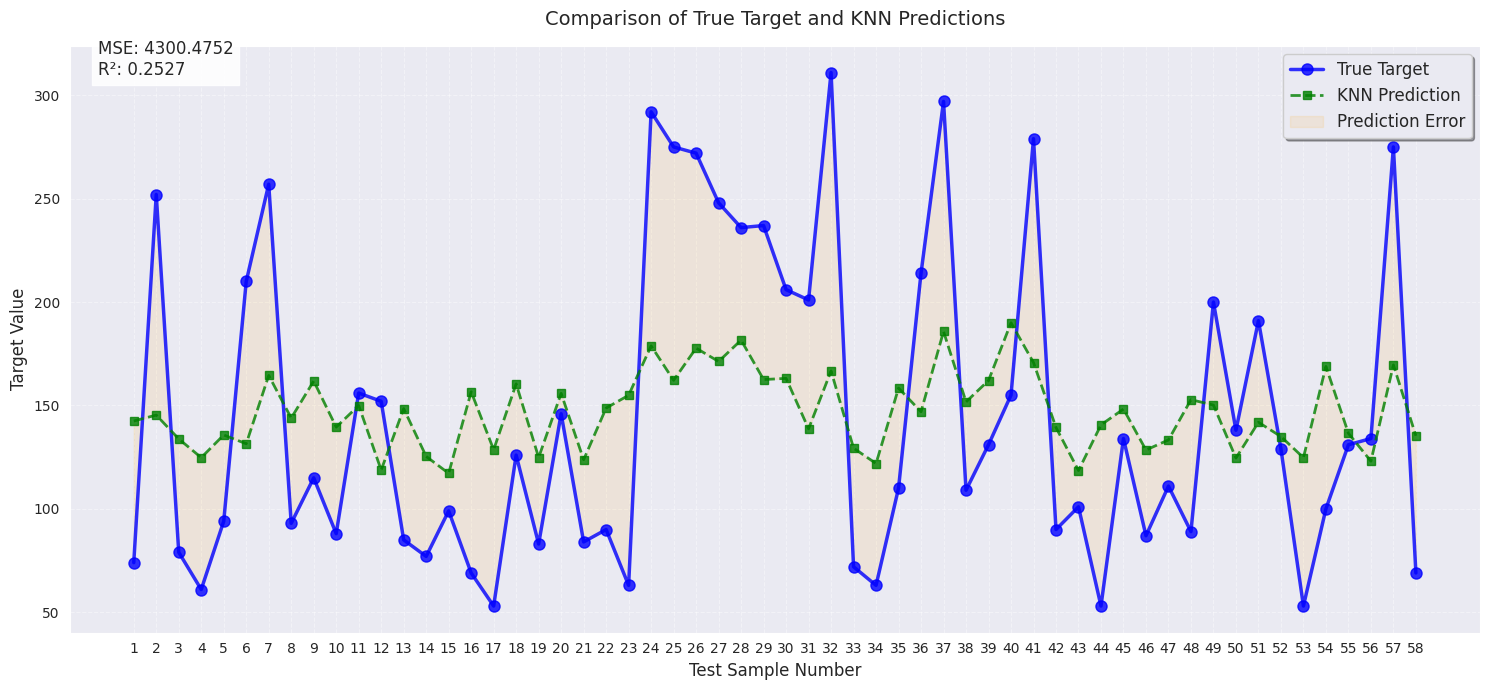

In [18]:

# تنظیمات نمودار
plt.figure(figsize=(15, 7))

# ایجاد داده برای نمودار
sample_numbers = np.arange(1, len(y_test)+1)

# رسم مقادیر واقعی و پیش‌بینی شده
plt.plot(sample_numbers, y_test, 'o-', label='True Target',
         color='blue', markersize=8, linewidth=2.5, alpha=0.8)
plt.plot(sample_numbers, final_preds1, 's--', label='KNN Prediction',
         color='green', markersize=6, linewidth=2, alpha=0.8)


plt.fill_between(sample_numbers, y_test, final_preds1, color='orange', alpha=0.1, label='Prediction Error')

# تنظیمات ظاهری
plt.title('Comparison of True Target and KNN Predictions', fontsize=14, pad=15)
plt.xlabel('Test Sample Number', fontsize=12)
plt.ylabel('Target Value', fontsize=12)
plt.xticks(sample_numbers)
plt.grid(True, linestyle='--', alpha=0.4)

# نمایش مقدار MSE
plt.text(0.02, 0.95, f'MSE: {mse_final:.4f}\nR²: {r2_final:.4f}', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.9))


plt.legend(fontsize=12, frameon=True, shadow=True)

plt.tight_layout()
plt.show()

روش جدید فیچر به فیچر بدون حذف فیچر

In [19]:



test_sizes = [0.11, 0.13, 0.15, 0.17, 0.19]


# لیست‌های ذخیره نتایج برای روش اول
mse_results_method1 = []
r2_results_method1 = []

# لیست‌های ذخیره نتایج برای روش دوم
mse_results_method2 = []
r2_results_method2 = []

for test_size in test_sizes:
    # تقسیم داده به آموزش و آزمون
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # روش اول: پیش‌بینی جداگانه هر ویژگی
    feature_preds = []
    for i in range(X_test.shape[0]):
        sample_preds = []
        for feature_idx in range(X.shape[1]):
            knn = KNeighborsRegressor(n_neighbors=k)
            knn.fit(X_train[:, feature_idx].reshape(-1, 1), y_train)
            pred = knn.predict(X_test[i, feature_idx].reshape(1, -1))[0]
            sample_preds.append(pred)
        feature_preds.append(sample_preds)

    final_preds = np.mean(feature_preds, axis=1)
    mse_results_method1.append(mean_squared_error(y_test, final_preds))
    r2_results_method1.append(r2_score(y_test, final_preds))

    # روش دوم: KNN رگرسیون معمولی
    knn_regular = KNeighborsRegressor(n_neighbors=k)
    knn_regular.fit(X_train, y_train)
    regular_preds = knn_regular.predict(X_test)
    mse_results_method2.append(mean_squared_error(y_test, regular_preds))
    r2_results_method2.append(r2_score(y_test, regular_preds))




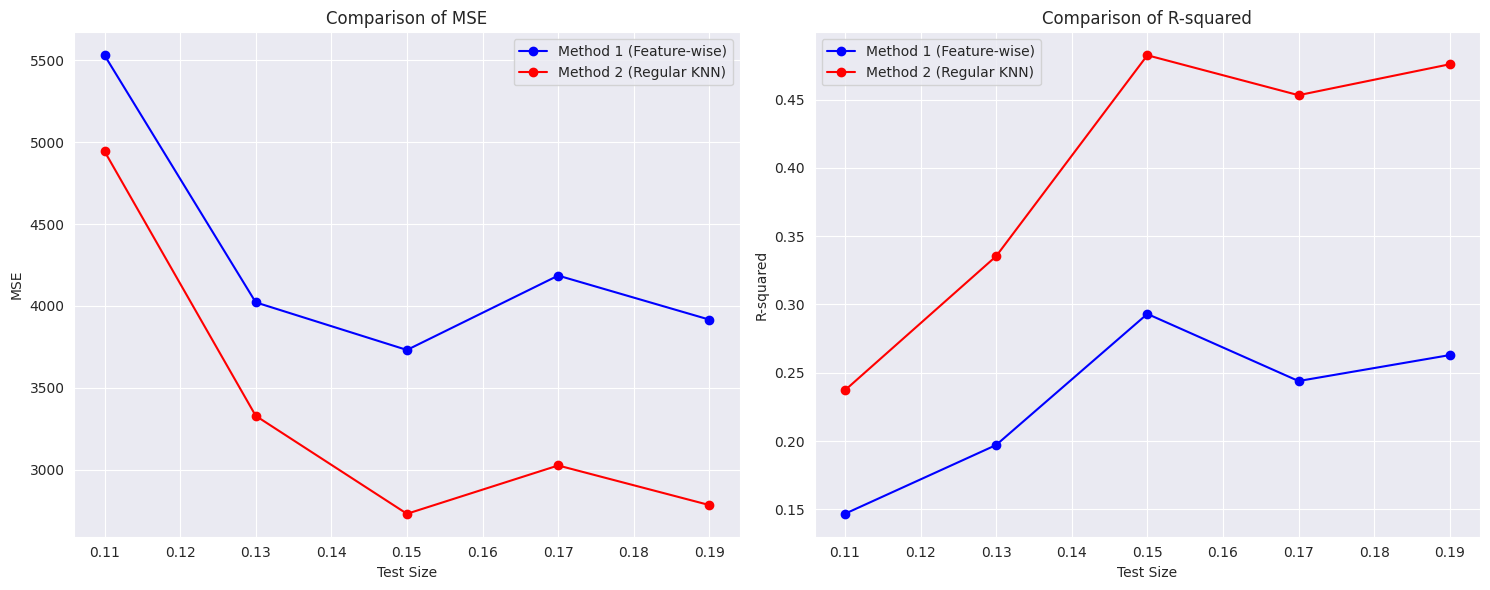

In [20]:
# رسم نمودارها
plt.figure(figsize=(15, 6))

# نمودار مقایسه MSE
plt.subplot(1, 2, 1)
plt.plot(test_sizes, mse_results_method1, 'bo-', label='Method 1 (Feature-wise)')
plt.plot(test_sizes, mse_results_method2, 'ro-', label='Method 2 (Regular KNN)')
plt.xlabel('Test Size')
plt.ylabel('MSE')
plt.title('Comparison of MSE')
plt.legend()
plt.grid(True)

# نمودار مقایسه R-squared
plt.subplot(1, 2, 2)
plt.plot(test_sizes, r2_results_method1, 'bo-', label='Method 1 (Feature-wise)')
plt.plot(test_sizes, r2_results_method2, 'ro-', label='Method 2 (Regular KNN)')
plt.xlabel('Test Size')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared')
plt.legend()

plt.tight_layout()
plt.show()

روش جدید فیچر به فیچر با حذف فیچر

In [43]:
test_sizes = [0.11, 0.13, 0.15, 0.17, 0.19]

# لیست‌های ذخیره نتایج برای روش اول
mse_results_method1 = []
r2_results_method1 = []

# لیست‌های ذخیره نتایج برای روش دوم
mse_results_method2 = []
r2_results_method2 = []

for test_size in test_sizes:
    # تقسیم داده به آموزش و آزمون
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # روش اول: انتخاب 30% ویژگی‌های برتر و پیش‌بینی با آن‌ها
    feature_scores = []

    # محاسبه دقت هر ویژگی به صورت جداگانه
    for feature_idx in range(X.shape[1]):
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train[:, feature_idx].reshape(-1, 1), y_train)
        preds = knn.predict(X_test[:, feature_idx].reshape(-1, 1))
        score = r2_score(y_test, preds)
        feature_scores.append((feature_idx, score))

    # انتخاب 30% ویژگی‌های برتر بر اساس R2-score
    feature_scores.sort(key=lambda x: x[1], reverse=True)
    num_top_features = int(0.30 * X.shape[1])
    top_features = [x[0] for x in feature_scores[:num_top_features]]

    # آموزش مدل نهایی روی ویژگی‌های انتخابی
    knn_final = KNeighborsRegressor(n_neighbors=k)
    knn_final.fit(X_train[:, top_features], y_train)
    final_preds = knn_final.predict(X_test[:, top_features])

    mse_results_method1.append(mean_squared_error(y_test, final_preds))
    r2_results_method1.append(r2_score(y_test, final_preds))

    # روش دوم: KNN رگرسیون معمولی (همانند قبل)
    knn_regular = KNeighborsRegressor(n_neighbors=k)
    knn_regular.fit(X_train, y_train)
    regular_preds = knn_regular.predict(X_test)
    mse_results_method2.append(mean_squared_error(y_test, regular_preds))
    r2_results_method2.append(r2_score(y_test, regular_preds))

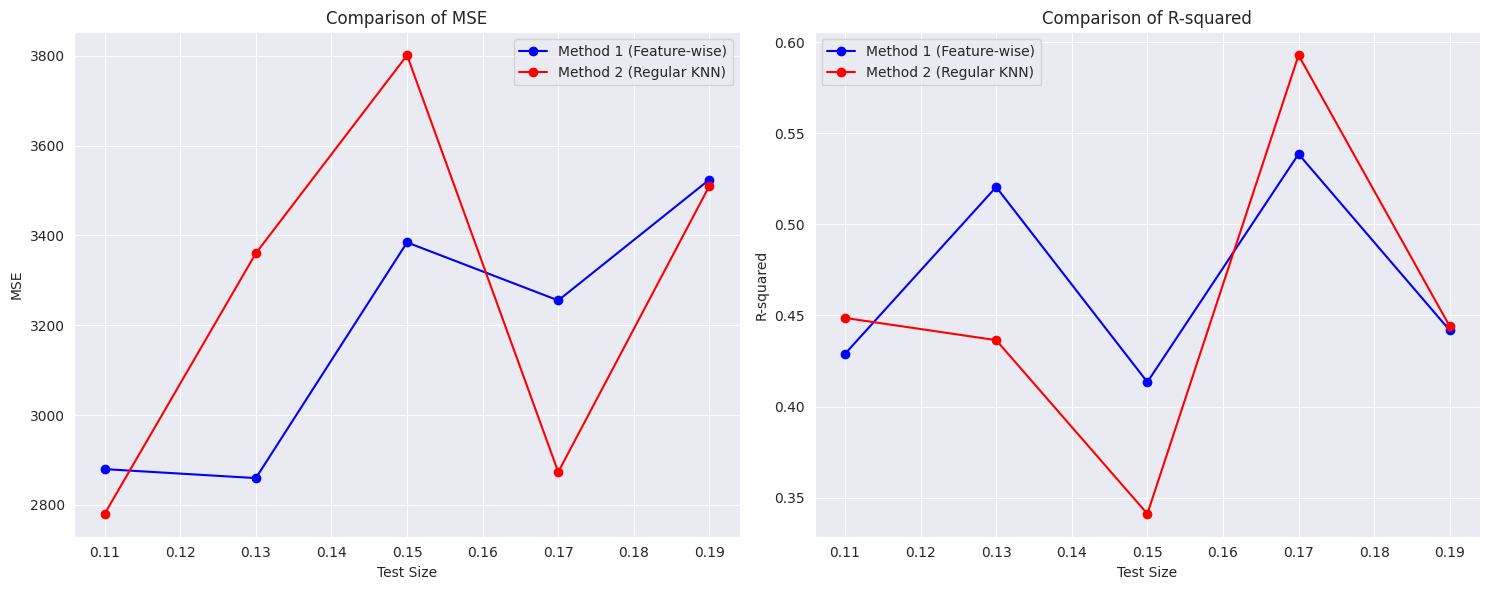

In [44]:
# رسم نمودارها
plt.figure(figsize=(15, 6))

# نمودار مقایسه MSE
plt.subplot(1, 2, 1)
plt.plot(test_sizes, mse_results_method1, 'bo-', label='Method 1 (Feature-wise)')
plt.plot(test_sizes, mse_results_method2, 'ro-', label='Method 2 (Regular KNN)')
plt.xlabel('Test Size')
plt.ylabel('MSE')
plt.title('Comparison of MSE')
plt.legend()
plt.grid(True)

# نمودار مقایسه R-squared
plt.subplot(1, 2, 2)
plt.plot(test_sizes, r2_results_method1, 'bo-', label='Method 1 (Feature-wise)')
plt.plot(test_sizes, r2_results_method2, 'ro-', label='Method 2 (Regular KNN)')
plt.xlabel('Test Size')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared')
plt.legend()

plt.tight_layout()
plt.show()

روش فیچر به فیچر با حذف فیچر و چاپ فیچر های مورد استفاده

In [45]:
test_sizes = [0.11, 0.13, 0.15, 0.17, 0.19]

# لیست‌های ذخیره نتایج برای روش اول
mse_results_method1 = []
r2_results_method1 = []

# لیست‌های ذخیره نتایج برای روش دوم
mse_results_method2 = []
r2_results_method2 = []


feature_names = [f"Feature_{i}" for i in range(X.shape[1])]

for test_size in test_sizes:
    print(f"\n--- Evaluating for test_size = {test_size} ---")

    # تقسیم داده به آموزش و آزمون
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # روش اول: انتخاب 30% ویژگی‌های برتر و پیش‌بینی با آن‌ها
    feature_scores = []

    # محاسبه دقت هر ویژگی به صورت جداگانه
    for feature_idx in range(X.shape[1]):
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train[:, feature_idx].reshape(-1, 1), y_train)
        preds = knn.predict(X_test[:, feature_idx].reshape(-1, 1))
        score = r2_score(y_test, preds)
        feature_scores.append((feature_idx, score))

    # انتخاب 30% ویژگی‌های برتر بر اساس R2-score
    feature_scores.sort(key=lambda x: x[1], reverse=True)
    num_top_features = int(0.30 * X.shape[1])
    top_features = [x[0] for x in feature_scores[:num_top_features]]

    # چاپ ویژگی‌های انتخابی
    print("\nSelected top 30% features:")
    for idx in top_features:
        print(f"{feature_names[idx]} (R2-score: {feature_scores[idx][1]:.4f})")

    # آموزش مدل نهایی روی ویژگی‌های انتخابی
    knn_final = KNeighborsRegressor(n_neighbors=k)
    knn_final.fit(X_train[:, top_features], y_train)
    final_preds = knn_final.predict(X_test[:, top_features])

    mse_results_method1.append(mean_squared_error(y_test, final_preds))
    r2_results_method1.append(r2_score(y_test, final_preds))

    # روش دوم: KNN رگرسیون معمولی (همانند قبل)
    knn_regular = KNeighborsRegressor(n_neighbors=k)
    knn_regular.fit(X_train, y_train)
    regular_preds = knn_regular.predict(X_test)
    mse_results_method2.append(mean_squared_error(y_test, regular_preds))
    r2_results_method2.append(r2_score(y_test, regular_preds))


--- Evaluating for test_size = 0.11 ---

Selected top 30% features:
Feature_2 (R2-score: 0.2854)
Feature_8 (R2-score: -0.0100)
Feature_7 (R2-score: 0.0150)

--- Evaluating for test_size = 0.13 ---

Selected top 30% features:
Feature_8 (R2-score: -0.1093)
Feature_2 (R2-score: 0.2298)
Feature_6 (R2-score: -0.0129)

--- Evaluating for test_size = 0.15 ---

Selected top 30% features:
Feature_2 (R2-score: 0.2078)
Feature_3 (R2-score: 0.1026)
Feature_9 (R2-score: -0.0484)

--- Evaluating for test_size = 0.17 ---

Selected top 30% features:
Feature_2 (R2-score: 0.2487)
Feature_8 (R2-score: -0.0744)
Feature_7 (R2-score: -0.0038)

--- Evaluating for test_size = 0.19 ---

Selected top 30% features:
Feature_3 (R2-score: 0.2085)
Feature_8 (R2-score: -0.0161)
Feature_2 (R2-score: 0.2102)


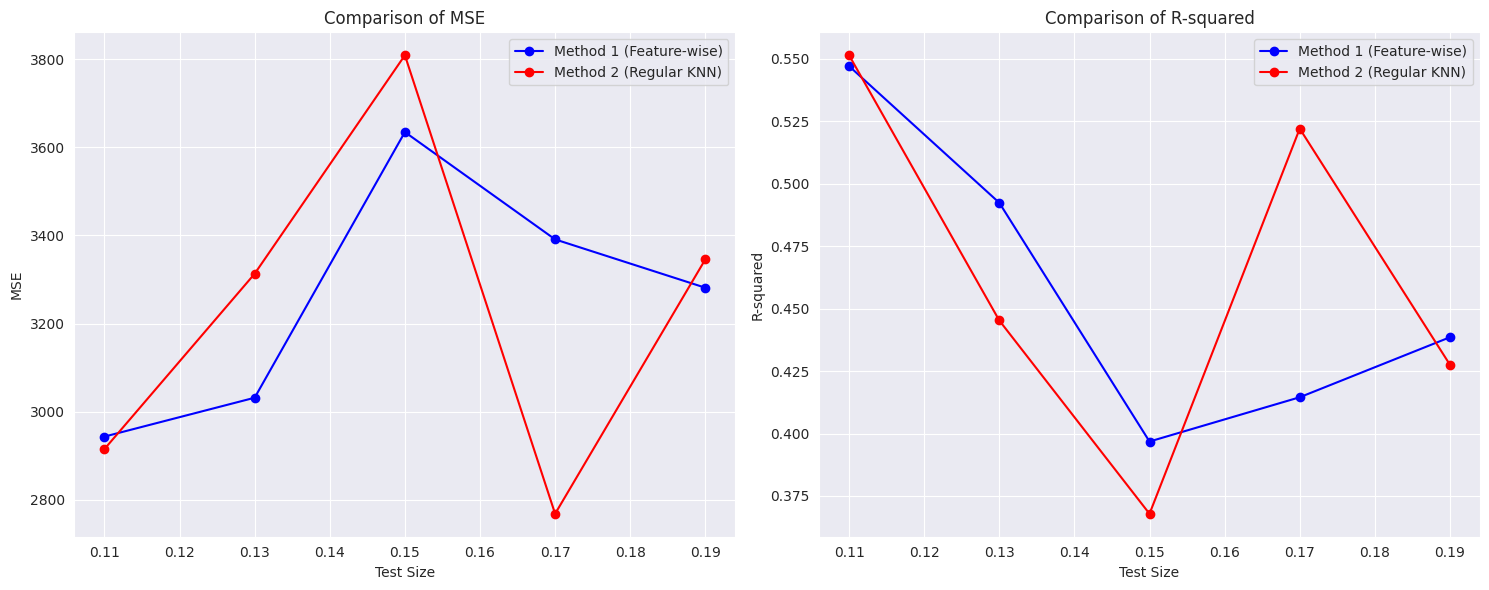

In [46]:
# رسم نمودارها
plt.figure(figsize=(15, 6))

# نمودار مقایسه MSE
plt.subplot(1, 2, 1)
plt.plot(test_sizes, mse_results_method1, 'bo-', label='Method 1 (Feature-wise)')
plt.plot(test_sizes, mse_results_method2, 'ro-', label='Method 2 (Regular KNN)')
plt.xlabel('Test Size')
plt.ylabel('MSE')
plt.title('Comparison of MSE')
plt.legend()
plt.grid(True)

# نمودار مقایسه R-squared
plt.subplot(1, 2, 2)
plt.plot(test_sizes, r2_results_method1, 'bo-', label='Method 1 (Feature-wise)')
plt.plot(test_sizes, r2_results_method2, 'ro-', label='Method 2 (Regular KNN)')
plt.xlabel('Test Size')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared')
plt.legend()

plt.tight_layout()
plt.show()